In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time 
from scipy.stats import kurtosis
from itertools import product
from collections import defaultdict
import scipy.sparse as sps
from scipy.linalg import pinv

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import FactorAnalysis 
from sklearn.decomposition import TruncatedSVD as SVD

In [2]:
df = pd.read_csv('winequality-white.csv',sep = ';')


#pick up features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]

#get dataset
X = df[features]
y = df['quality']

scale = MinMaxScaler(feature_range=[0,100])
scale.fit(X)
X_norm = pd.DataFrame(scale.transform(X))

kmeans run time: 31.8 [s]


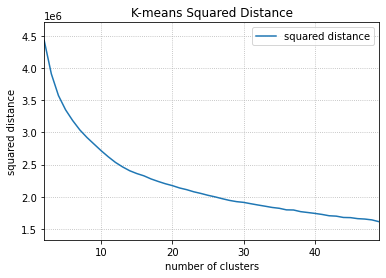

In [3]:
###################### K means clustering #######################
range_n_clusters = list(range(2,50))
kmeans_distance = []
kmeans_silhouette = []
kmeans_homogeneity = []
kmeans_completeness = []
kmeans_NMI = []
start = time.perf_counter() 
for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters=n_clusters, random_state=10).fit(X_norm)
    kmeans_distance.append(cluster.inertia_)    
    cluster_labels = cluster.labels_
    kmeans_silhouette.append(silhouette_score(X_norm, cluster_labels))
    kmeans_homogeneity.append(metrics.homogeneity_score(y, cluster_labels))
    kmeans_completeness.append(metrics.completeness_score(y, cluster_labels))
    kmeans_NMI.append(normalized_mutual_info_score(y, cluster_labels))
end = time.perf_counter() 
print("kmeans run time: %.1f [s]" % (end - start))

plt.figure()
plt.title('K-means Squared Distance')
plt.ylabel('squared distance')
plt.xlabel('number of clusters')
plt.grid(linestyle='dotted')
plt.plot(range_n_clusters, kmeans_distance, label = 'squared distance')
plt.legend()
plt.margins(0,0.1)
plt.show()
plt.close()

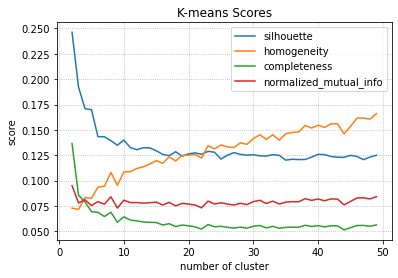

In [7]:
plt.figure()
plt.title('K-means Scores')
plt.ylabel('score')
plt.xlabel('number of cluster')
plt.plot(range_n_clusters, kmeans_silhouette, label='silhouette')
plt.plot(range_n_clusters, kmeans_homogeneity, label='homogeneity')
plt.plot(range_n_clusters, kmeans_completeness, label='completeness')
plt.plot(range_n_clusters, kmeans_NMI, label='normalized_mutual_info')
plt.grid(linestyle='dotted')
plt.legend()
#plt.savefig('kmeans2.png')
plt.show()
plt.close()

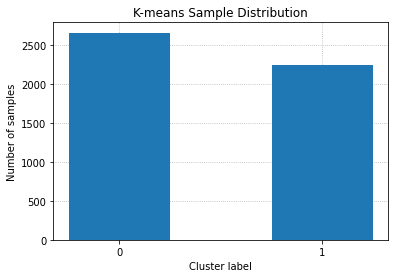

In [10]:
#visulization of clusters
k = 2
cluster = KMeans(n_clusters=k, random_state=10).fit(X_norm)
cluster_labels = cluster.labels_
plt.figure()
plt.title('K-means Sample Distribution')
plt.hist(cluster.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid(linestyle='dotted')
#plt.savefig('kmeans3.png')
plt.show()
plt.close()

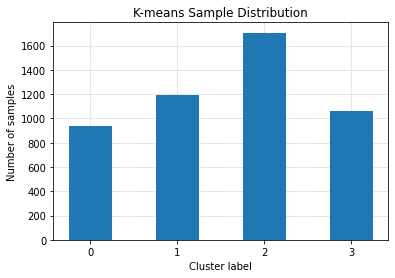

In [17]:
#visulization of clusters
k = 4
cluster = KMeans(n_clusters=k, random_state=10).fit(X_norm)
cluster_labels = cluster.labels_
plt.figure()
plt.title('K-means Sample Distribution')
plt.hist(cluster.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid(linestyle='dotted')
#plt.savefig('kmeans3.png')
plt.show()
plt.close()

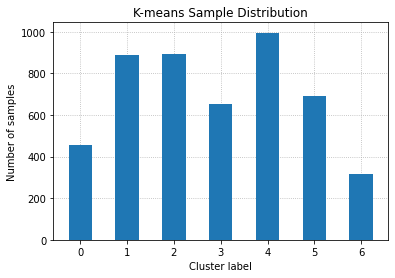

In [18]:
#visulization of clusters
k = 7
cluster = KMeans(n_clusters=k, random_state=10).fit(X_norm)
cluster_labels = cluster.labels_
plt.figure()
plt.title('K-means Sample Distribution')
plt.hist(cluster.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid(linestyle='dotted')
#plt.savefig('kmeans3.png')
plt.show()
plt.close()

EM run time: 58.3 [s]


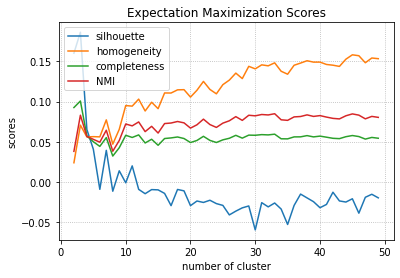

In [5]:
#Expectation Maximization
range_n_clusters = list(range(2,50))
EM_silhouette = []
EM_homogeneity = []
EM_completeness = []
EM_NMI = []
EM_AIC = []
EM_BIC = []
start = time.perf_counter() 
for  n_clusters  in range_n_clusters :
    cluster = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_norm) 
    cluster_labels = cluster.predict(X_norm) 
    EM_silhouette.append(silhouette_score(X_norm, cluster_labels))
    EM_homogeneity.append(metrics.homogeneity_score(y, cluster_labels))
    EM_completeness.append(metrics.completeness_score(y, cluster_labels))
    EM_NMI.append(normalized_mutual_info_score(y, cluster_labels))
    EM_AIC.append(cluster.aic(X_norm)) 
    EM_BIC.append(cluster.bic(X_norm))  
end = time.perf_counter() 
print("EM run time: %.1f [s]" % (end-start))    
    
plt.figure()
plt.title('Expectation Maximization Scores')
plt.plot(range_n_clusters, EM_silhouette, label="silhouette")
plt.plot(range_n_clusters, EM_homogeneity, label="homogeneity")
plt.plot(range_n_clusters, EM_completeness, label="completeness")
plt.plot(range_n_clusters, EM_NMI, label="NMI")
plt.ylabel('scores')
plt.xlabel('number of cluster')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

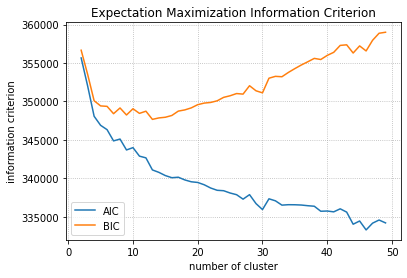

In [11]:
plt.figure()
plt.title('Expectation Maximization Information Criterion')
plt.plot(range_n_clusters, EM_AIC, label="AIC")
plt.plot(range_n_clusters, EM_BIC, label="BIC")
plt.ylabel('information criterion')
plt.xlabel('number of cluster')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

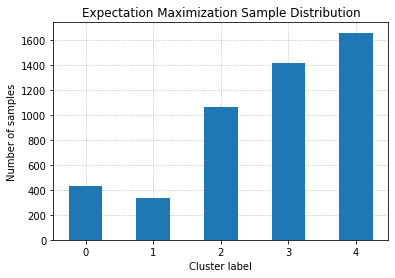

In [19]:
#visulization of clusters
k = 5
cluster = GaussianMixture(n_components=k, random_state=10).fit(X_norm) 
cluster_labels = cluster.predict(X_norm)
plt.figure()
plt.title('Expectation Maximization Sample Distribution')
plt.hist(cluster_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid(linestyle='dotted')
plt.show()
plt.close()

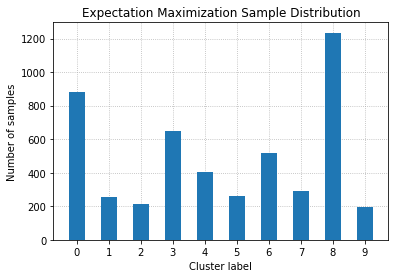

In [20]:
#visulization of clusters
k = 10
cluster = GaussianMixture(n_components=k, random_state=10).fit(X_norm) 
cluster_labels = cluster.predict(X_norm)
plt.figure()
plt.title('Expectation Maximization Sample Distribution')
plt.hist(cluster_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.grid(linestyle='dotted')
plt.show()
plt.close()

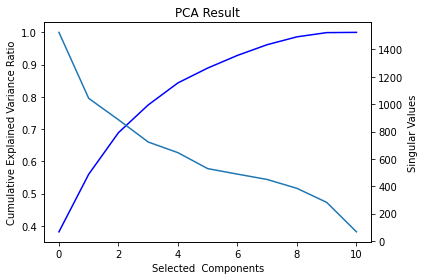

PCA run time: 0.2 [s]


In [21]:
#################### PCA #############################
##explaination ratio to decide which component ###
start = time.perf_counter() 
pca = PCA(random_state=10).fit(X_norm) #for all components
sum_var = np.cumsum(pca.explained_variance_ratio_)
fig, ax1 = plt.subplots()
plt.title('PCA Result')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.tick_params('y')
ax1.plot(list(range(len(pca.explained_variance_ratio_))), sum_var, 'b-')
ax1.set_xlabel('Selected  Components')

ax2 = ax1.twinx()
ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_)
ax2.set_ylabel('Singular Values')
ax2.tick_params('y')
fig.tight_layout()
plt.show()
end = time.perf_counter() 
print("PCA run time: %.1f [s]" % (end-start))    

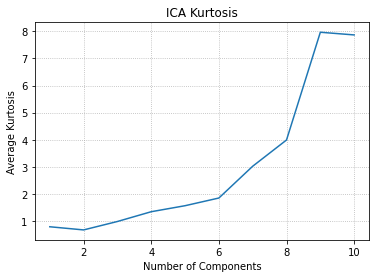

ICA run time: 0.3 [s]


In [22]:
############## ICA #################
start = time.perf_counter() 
dims = list(range(1,X_norm.shape[1]))
ica = FastICA(random_state=10)
kurt = {}

for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(X_norm)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()


plt.figure()
plt.title("ICA Kurtosis")
plt.xlabel("Number of Components")
plt.ylabel("Average Kurtosis")
plt.plot(kurt.keys(), kurt.values())
plt.grid(linestyle='dotted')
plt.show()
plt.close()

end = time.perf_counter() 
print("ICA run time: %.1f [s]" % (end-start))    


In [ ]:
############### random projection ####################
##########low error############
start = time.perf_counter() 
def reconstruction_error(projections, x):
    w = projections.components_
    if sps.issparse(w):
        w = w.todense()
    p = pinv(w)
    reconstructed = ((p@w)@(x.T)).T  # Unproject projected data
    errors = np.square(x-reconstructed)
    return np.nanmean(errors) 
    

dims =  list(range(1,X_norm.shape[1]+1))   
tmp = defaultdict(dict)
for i,dim in product(range(10),dims):
    rp = SparseRandomProjection(random_state=10, n_components=dim)
    rp = rp.fit(X_norm)
    
    tmp[dim][i] = reconstruction_error(rp, X_norm)
tmp = pd.DataFrame(tmp).T

plt.figure()
plt.ylabel('error')
plt.xlabel('number of components')
plt.title("Random Projection Reconstruction Error")
plt.plot(dims,tmp)
plt.grid()
plt.show()
plt.close()
end = time.perf_counter() 
print("random projection run time: %.1f [s]" % (end-start))    

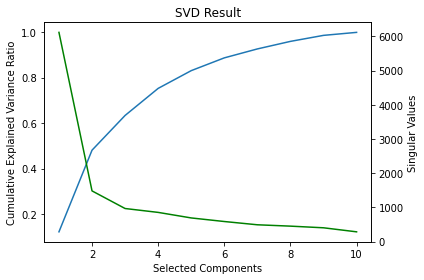

svd run time: 0.2 [s]


In [24]:
################### Singular Value Decomposition #########################
start = time.perf_counter() 
dims =  list(range(1,X_norm.shape[1])) 
svd = SVD(random_state=10)

for dim in dims:
    svd.set_params(n_components=dim)
    svd.fit_transform(X_norm)
    sv = svd.singular_values_
    sum_var = np.cumsum(svd.explained_variance_ratio_)

fig, ax1 = plt.subplots()
plt.title('SVD Result')
ax1.plot(dims, sum_var)
ax1.set_xlabel('Selected Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.tick_params('y')

ax2 = ax1.twinx()
ax2.plot(dims, sv,color = 'g')
ax2.set_ylabel('Singular Values')
ax2.tick_params('y')
fig.tight_layout()
plt.show()
plt.close()
end = time.perf_counter() 
print("svd run time: %.1f [s]" % (end-start)) 

In [25]:
###################### Dimension Reduction ##################################

###########K means with dimension reduction##########

range_n_clusters = list(range(2,50))
kmeans_distance = []
kmeans_distance_pca = []
kmeans_distance_ica = []
kmeans_distance_rp = []
kmeans_distance_svd = []
kmeans_silhouette = []
kmeans_silhouette_pca = []
kmeans_silhouette_ica = []
kmeans_silhouette_rp = []
kmeans_silhouette_svd = []
kmeans_homogeneity = []
kmeans_homogeneity_pca = []
kmeans_homogeneity_ica = []
kmeans_homogeneity_rp = []
kmeans_homogeneity_svd = []
kmeans_completeness = []
kmeans_completeness_pca = []
kmeans_completeness_ica = []
kmeans_completeness_rp = []
kmeans_completeness_svd = []

for n_clusters in list(range_n_clusters):
    
    X_pca = PCA(n_components=2,random_state=10).fit_transform(X_norm)
    X_ica = FastICA(n_components=9,random_state=10).fit_transform(X_norm)
    X_rp = SparseRandomProjection(n_components=10,random_state=10).fit_transform(X_norm)
    X_svd = SVD(n_components=4,random_state=10).fit_transform(X_norm)
    cluster = KMeans(n_clusters=n_clusters, random_state=10).fit(X_norm)
    cluster_pca = KMeans(n_clusters=n_clusters, random_state=10).fit(X_pca)
    cluster_ica = KMeans(n_clusters=n_clusters, random_state=10).fit(X_ica)
    cluster_rp = KMeans(n_clusters=n_clusters, random_state=10).fit(X_rp)
    cluster_svd = KMeans(n_clusters=n_clusters, random_state=10).fit(X_svd)
    kmeans_distance.append(cluster.inertia_)
    kmeans_distance_pca.append(cluster_pca.inertia_)
    kmeans_distance_ica.append(cluster_ica.inertia_)    
    kmeans_distance_rp.append(cluster_rp.inertia_)
    kmeans_distance_svd.append(cluster_svd.inertia_)   
    kmeans_labels = cluster.labels_
    kmeans_labels_pca = cluster_pca.labels_
    kmeans_labels_ica = cluster_ica.labels_
    kmeans_labels_rp = cluster_rp.labels_
    kmeans_labels_svd = cluster_svd.labels_
    kmeans_silhouette.append(silhouette_score(X_norm, kmeans_labels))
    kmeans_silhouette_pca.append(silhouette_score(X_pca, kmeans_labels_pca))
    kmeans_silhouette_ica.append(silhouette_score(X_ica, kmeans_labels_ica))
    kmeans_silhouette_rp.append(silhouette_score(X_rp, kmeans_labels_rp))
    kmeans_silhouette_svd.append(silhouette_score(X_svd, kmeans_labels_svd))
    kmeans_homogeneity.append(metrics.homogeneity_score(y, kmeans_labels))
    kmeans_homogeneity_pca.append(metrics.homogeneity_score(y, kmeans_labels_pca))
    kmeans_homogeneity_ica.append(metrics.homogeneity_score(y, kmeans_labels_ica))
    kmeans_homogeneity_rp.append(metrics.homogeneity_score(y, kmeans_labels_rp))
    kmeans_homogeneity_svd.append(metrics.homogeneity_score(y, kmeans_labels_svd))
    kmeans_completeness.append(metrics.completeness_score(y, kmeans_labels))
    kmeans_completeness_pca.append(metrics.completeness_score(y, kmeans_labels_pca))
    kmeans_completeness_ica.append(metrics.completeness_score(y, kmeans_labels_ica))
    kmeans_completeness_rp.append(metrics.completeness_score(y, kmeans_labels_rp))
    kmeans_completeness_svd.append(metrics.completeness_score(y, kmeans_labels_svd))

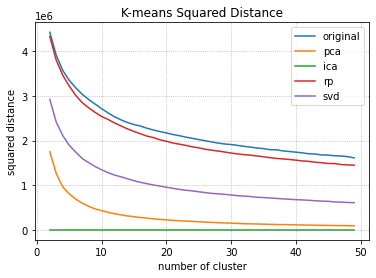

In [26]:
    #SSE
plt.figure()
plt.title('K-means Squared Distance')
plt.plot(range_n_clusters, kmeans_distance, label="original")
plt.plot(range_n_clusters, kmeans_distance_pca, label="pca")
plt.plot(range_n_clusters, kmeans_distance_ica, label="ica")
plt.plot(range_n_clusters, kmeans_distance_rp, label="rp")
plt.plot(range_n_clusters, kmeans_distance_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('squared distance')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

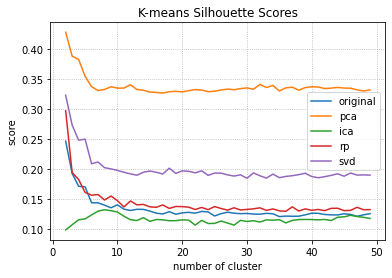

In [27]:
    #silhouette
plt.figure()
plt.title('K-means Silhouette Scores')
plt.plot(range_n_clusters, kmeans_silhouette, label="original")
plt.plot(range_n_clusters, kmeans_silhouette_pca, label="pca")
plt.plot(range_n_clusters, kmeans_silhouette_ica, label="ica")
plt.plot(range_n_clusters, kmeans_silhouette_rp, label="rp")
plt.plot(range_n_clusters, kmeans_silhouette_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

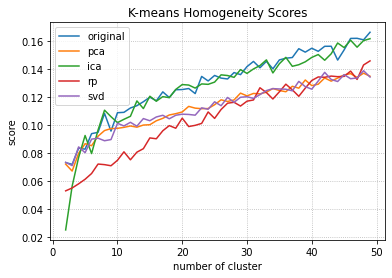

In [28]:
    #homogeneity
plt.figure()
plt.title('K-means Homogeneity Scores')
plt.plot(range_n_clusters, kmeans_homogeneity, label="original")
plt.plot(range_n_clusters, kmeans_homogeneity_pca, label="pca")
plt.plot(range_n_clusters, kmeans_homogeneity_ica, label="ica")
plt.plot(range_n_clusters, kmeans_homogeneity_rp, label="rp")
plt.plot(range_n_clusters, kmeans_homogeneity_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

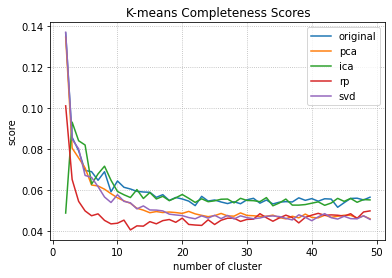

In [29]:
    #completeness
plt.figure()
plt.title('K-means Completeness Scores')
plt.plot(range_n_clusters, kmeans_completeness, label="original")
plt.plot(range_n_clusters, kmeans_completeness_pca, label="pca")
plt.plot(range_n_clusters, kmeans_completeness_ica, label="ica")
plt.plot(range_n_clusters, kmeans_completeness_rp, label="rp")
plt.plot(range_n_clusters, kmeans_completeness_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

In [30]:
######## EM dimension reduction ###########



range_n_clusters = list(range(2,50))
em_aic = []
em_aic_pca = []
em_aic_ica = []
em_aic_rp = []
em_aic_svd = []
em_bic = []
em_bic_pca = []
em_bic_ica = []
em_bic_rp = []
em_bic_svd = []
em_silhouette = []
em_silhouette_pca = []
em_silhouette_ica = []
em_silhouette_rp = []
em_silhouette_svd = []
em_homogeneity = []
em_homogeneity_pca = []
em_homogeneity_ica = []
em_homogeneity_rp = []
em_homogeneity_svd = []
em_completeness = []
em_completeness_pca = []
em_completeness_ica = []
em_completeness_rp = []
em_completeness_svd = []

for index, n_clusters in enumerate(range_n_clusters):
    
    X_pca = PCA(n_components=2,random_state=10).fit_transform(X_norm)
    X_ica = FastICA(n_components=9,random_state=10).fit_transform(X_norm)
    X_rp = SparseRandomProjection(n_components=10,random_state=10).fit_transform(X_norm)
    X_svd = SVD(n_components=4,random_state=10).fit_transform(X_norm)
    cluster =  GaussianMixture(n_components=n_clusters, random_state=10).fit(X_norm)
    cluster_pca =  GaussianMixture(n_components=n_clusters, random_state=10).fit(X_pca)
    cluster_ica =  GaussianMixture(n_components=n_clusters, random_state=10).fit(X_ica)
    cluster_rp =  GaussianMixture(n_components=n_clusters, random_state=10).fit(X_rp)
    cluster_svd =  GaussianMixture(n_components=n_clusters, random_state=10).fit(X_svd)
    em_labels =     cluster.predict(X_norm)
    em_labels_pca = cluster_pca.predict(X_pca)
    em_labels_ica = cluster_ica.predict(X_ica)
    em_labels_rp =  cluster_rp.predict(X_rp)
    em_labels_svd = cluster_svd.predict(X_svd)
    em_bic.append(cluster.bic(X_norm))
    em_bic_pca.append(cluster_pca.bic(X_pca))
    em_bic_ica.append(cluster_ica.bic(X_ica))    
    em_bic_rp.append(cluster_rp.bic(X_rp))
    em_bic_svd.append(cluster_svd.bic(X_svd))
    em_aic.append(cluster.aic(X_norm))
    em_aic_pca.append(cluster_pca.aic(X_pca))
    em_aic_ica.append(cluster_ica.aic(X_ica))    
    em_aic_rp.append(cluster_rp.aic(X_rp))
    em_aic_svd.append(cluster_svd.aic(X_svd)) 
    em_silhouette.append(silhouette_score(X_norm, em_labels))
    em_silhouette_pca.append(silhouette_score(X_pca, em_labels_pca))
    em_silhouette_ica.append(silhouette_score(X_ica, em_labels_ica))
    em_silhouette_rp.append(silhouette_score(X_rp, em_labels_rp))
    em_silhouette_svd.append(silhouette_score(X_svd, em_labels_svd))
    em_homogeneity.append(metrics.homogeneity_score(y, em_labels))
    em_homogeneity_pca.append(metrics.homogeneity_score(y, em_labels_pca))
    em_homogeneity_ica.append(metrics.homogeneity_score(y, em_labels_ica))
    em_homogeneity_rp.append(metrics.homogeneity_score(y, em_labels_rp))
    em_homogeneity_svd.append(metrics.homogeneity_score(y, em_labels_svd))
    em_completeness.append(metrics.completeness_score(y, em_labels))
    em_completeness_pca.append(metrics.completeness_score(y, em_labels_pca))
    em_completeness_ica.append(metrics.completeness_score(y, em_labels_ica))
    em_completeness_rp.append(metrics.completeness_score(y, em_labels_rp))
    em_completeness_svd.append(metrics.completeness_score(y, em_labels_svd))

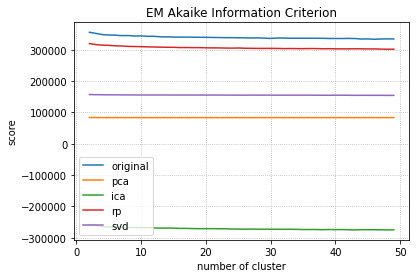

In [31]:
#the lower the better
plt.figure()
plt.title('EM Akaike Information Criterion')
plt.plot(range_n_clusters, em_aic, label="original")
plt.plot(range_n_clusters, em_aic_pca, label="pca")
plt.plot(range_n_clusters, em_aic_ica, label="ica")
plt.plot(range_n_clusters, em_aic_rp, label="rp")
plt.plot(range_n_clusters,em_aic_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

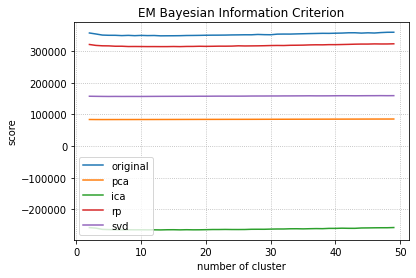

In [32]:
#the lower the better
plt.figure()
plt.title('EM Bayesian Information Criterion')
plt.plot(range_n_clusters, em_bic, label="original")
plt.plot(range_n_clusters, em_bic_pca, label="pca")
plt.plot(range_n_clusters, em_bic_ica, label="ica")
plt.plot(range_n_clusters, em_bic_rp, label="rp")
plt.plot(range_n_clusters,em_bic_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

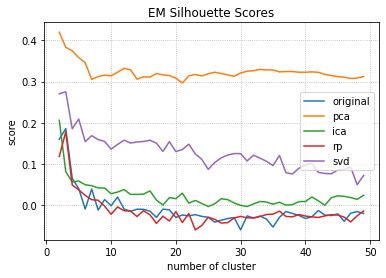

In [33]:
    #silhouette
plt.figure()
plt.title('EM Silhouette Scores')
plt.plot(range_n_clusters, em_silhouette, label="original")
plt.plot(range_n_clusters, em_silhouette_pca, label="pca")
plt.plot(range_n_clusters, em_silhouette_ica, label="ica")
plt.plot(range_n_clusters, em_silhouette_rp, label="rp")
plt.plot(range_n_clusters, em_silhouette_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

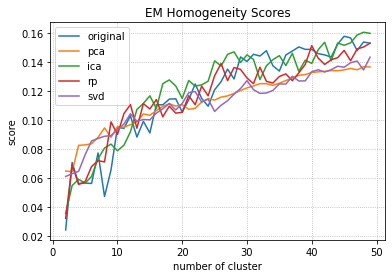

In [34]:
    #homogeneity
plt.figure()
plt.title('EM Homogeneity Scores')
plt.plot(range_n_clusters, em_homogeneity, label="original")
plt.plot(range_n_clusters, em_homogeneity_pca, label="pca")
plt.plot(range_n_clusters, em_homogeneity_ica, label="ica")
plt.plot(range_n_clusters, em_homogeneity_rp, label="rp")
plt.plot(range_n_clusters, em_homogeneity_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()

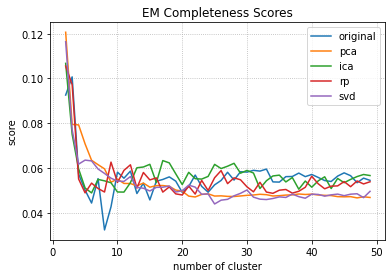

In [35]:
    #completeness
plt.figure()
plt.title('EM Completeness Scores')
plt.plot(range_n_clusters, em_completeness, label="original")
plt.plot(range_n_clusters, em_completeness_pca, label="pca")
plt.plot(range_n_clusters, em_completeness_ica, label="ica")
plt.plot(range_n_clusters, em_completeness_rp, label="rp")
plt.plot(range_n_clusters, em_completeness_svd, label="svd")
plt.xlabel('number of cluster')
plt.ylabel('score')
plt.grid(linestyle='dotted')
plt.legend()
plt.show()
plt.close()